출처

https://alex-blog.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9DANOVA-feat-python

https://partrita.github.io/posts/ANOVA-python/


정독하기
https://junsik-hwang.tistory.com/26?category=803034
https://junsik-hwang.tistory.com/27?category=803034

![](image/%EB%B6%84%EC%82%B0%EB%B6%84%EC%84%9D.png)

### 분산분석이란?
T-test는 독립변수가 1개,  종속변수가 1개이며 그 중 독립변수의 수준이 2개일 경우 적합하다. 

예를 들어, 독립변수 성별 => 여자,남자면 수준 2개

ANOVA는 독립변수의 수준이 3개 이상(예를 들어 여성, 남성, 중성)일 때 적합하다.

출처: https://withchu.tistory.com/entry/Python-ANOVAanalysis-of-variance-분산분석 [code with chu:티스토리]

두개 이상의 집단에서 그룹 평균 간 차이를 그룹 내 병동에 비교하여 살펴보는 데이터 분석 방법이다.

즉, 두 개 이상 집단들의 평균 간 차이에 대한 통계적 유의성을 검증(두 개 이상 집단들의 평균을 비교)하는 방법이다.

|분석 구분|분석 명칭|독립변수 개수|종속변수 개수|
|------|---|---|---|
|단일변량 분산분석|일원배치 분산분석|1개|1개|
|.|이원배치 분산분석|2개|1개|
|.|다원배치 분산분석|3개 이상|1개|
|다변량 분산분석|MANOVA|1개 이상|2개 이상|


##### 분산분석의 가정
* 정규성 가정 : 각각의 그룹에서 표본은 정규성을 가진다.
* 등분산성 가정 : 각 집단의 분산은 서로 동일해야 한다.
* 독립성 가정 : 표본은 서로 독립적이어야 한다.

------------------------------------------------------

#### 일원배치 분산분석

* 분산분석에서 반응값에 대해 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증 방법이다.

* 모집단의 수에는 제한이 없으며, 각 표본의 수는 같지 않아도 된다.

* F 검정 통계량을 이용한다.

#### 일원배치 분산분석 예제

이번 예제에서는 온도(더움, 보통, 추움) 별 로 매출건수에 차이가 있는지를 분석함.(일원배치 분산분석)

귀무가설 - 세가지 온도 변수에 따라 매출건수의 평균은 모두 같다.

대립가설 - 적어도 하나의 온도변수에 대한 매출건수의 평균값에는 차이가 있다.

maxTa = 일 최고 온도 /
CNT = 매출건수

In [11]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\whgur\Desktop\workspace\ADP\data\sales.csv', dtype={'YMD':'object'})
wt = pd.read_csv(r'C:\Users\whgur\Desktop\workspace\ADP\data\weather.csv')

wt.tm = wt.tm.map(lambda x: x.replace('-',''))
DF = data.merge(wt, how='left', left_on='YMD', right_on='tm')

data = DF.iloc[:,[0,2,7,8]]
data.head()

,YMD,CNT,maxTa,sumRn
0,20190514,1,26.9,0.0
1,20190519,1,21.6,22.0
2,20190521,4,23.8,0.0
3,20190522,7,26.5,0.0
4,20190523,13,29.2,0.0


In [12]:
data['Ta_gubun'] = pd.cut(data.maxTa, bins=[-5,8,24,36], labels=[0,1,2]) # 온도에 따라 구간화한 변수 추가
data = data[data.Ta_gubun.notna()]

data.head()

c:\Users\whgur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YMD,CNT,maxTa,sumRn,Ta_gubun
0,20190514,1,26.9,0.0,2
1,20190519,1,21.6,22.0,1
2,20190521,4,23.8,0.0,1
3,20190522,7,26.5,0.0,2
4,20190523,13,29.2,0.0,2


In [22]:
from scipy import stats
x1 = np.array(data[data.Ta_gubun==0].CNT)
x2 = np.array(data[data.Ta_gubun==1].CNT)
x3 = np.array(data[data.Ta_gubun==2].CNT)

#세 그룹으로 데이터를 나누어 준 뒤, 등분산 검정과 정규성 검정을 함께 수행한다. 

print('등분산 검정')
print(stats.bartlett(x1,x2,x3),stats.fligner(x1, x2, x3) ,stats.levene(x1, x2, x3), sep="\n")
# 모두 이분산

print('')

print('정규성 검정 콜모고로프-스미르노프 검정')
print(stats.ks_2samp(x1, x2), stats.ks_2samp(x1, x3), stats.ks_2samp(x3, x2),  sep="\n")
#stats.ks_2samp : 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test)은 사실 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법입니다. 
print('')
print('정규성 검정 샤피로')
print(stats.shapiro(x1), stats.shapiro(x2), stats.shapiro(x3),  sep="\n")
# Shaprio 귀무가설: 데이터가 정규분포를 따른다
# 대립가설: 데이터가 정규분포를 따르지 않는다.
# x3이 정규성을 만족하지 못한다.

등분산 검정
BartlettResult(statistic=22.616041375862505, pvalue=1.2274081819568217e-05)
FlignerResult(statistic=15.610663888287414, pvalue=0.0004075561089268891)
LeveneResult(statistic=8.196770596662436, pvalue=0.0003371652784692629)

정규성 검정 콜모고로프-스미르노프 검정
Ks_2sampResult(statistic=0.5184201792233654, pvalue=1.1789680343099462e-11)
Ks_2sampResult(statistic=0.887536231884058, pvalue=7.622631177796951e-31)
Ks_2sampResult(statistic=0.49868702290076333, pvalue=5.329070518200751e-15)

정규성 검정 샤피로
(0.9851052165031433, 0.5847653746604919)
(0.9924936890602112, 0.7139248847961426)
(0.9764286279678345, 0.027653351426124573)


등분산, 정규성 검정 모두 통과하지 못함.

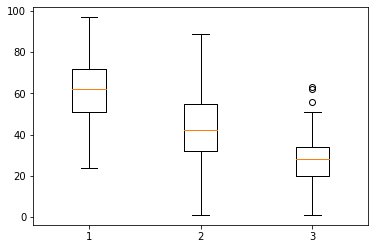

In [14]:
import matplotlib.pyplot as plt

spp = data.loc[:,['CNT','Ta_gubun']]
spp.groupby("Ta_gubun").count()

sp= np.array(spp)

group1 = sp[sp[: , 1]==0,0]
group2 = sp[sp[: , 1]==1,0]
group3 = sp[sp[: , 1]==2,0]

# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
plot_sp= [group1,group2, group3]

ax = plt.boxplot(plot_sp)
plt.show()

In [15]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3) # 모든 가정을 만족할 때 사용
print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.10f}'.format(F_statistic, pVal))

# 귀무가설 기각

데이터의 일원분산분석 결과 : F=131.4, p=0.0000000000


In [16]:
stats.kruskal(group1, group2, group3) # 하나의 집단이라도 정규성 가정x -> Kruskal-Waliis test
# 정규성 가정이 충족되지 않았을 때도 귀무가설 기각

KruskalResult(statistic=151.15514059708158, pvalue=1.5034128699130222e-33)

In [26]:
#등분산성 가정x Welch’s ANOVA
from pingouin import welch_anova

df = data
aov = welch_anova(dv='CNT', between='Ta_gubun', data=df) 
aov 

# 등분산성 가정을 만족하지 않았을 때도 귀무가설 기각. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Ta_gubun,2,168.755118,155.455625,5.240752e-39,0.449407


#### 사후분석

위 분석을 통해 날씨(추움, 보통, 더움)에 의해 매출건수 평균의 차이가 있는 것으로 나타남.

구체적으로 어떤 날씨에 매출건수 평균이 낮은건지 확인하기 위해서 **사후분석**을 진행

사후분석에서는 귀무가설을 "집단들 사이의 평균은 같다", 대립가설을 "집단들 사이의 평균은 같지 않다"로 두고 모든 집단 수준에 대해서 두 집단씩 짝을 지어 각각 다중비교를 수행한다.

In [34]:
spp.head()

,CNT,Ta_gubun
0,1,2
1,1,1
2,4,1
3,7,2
4,13,2


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1 -18.1967  -0.0 -23.1389 -13.2545   True
     0      2 -33.9588  -0.0 -38.9418 -28.9759   True
     1      2 -15.7621  -0.0 -19.9164 -11.6079   True
-----------------------------------------------------


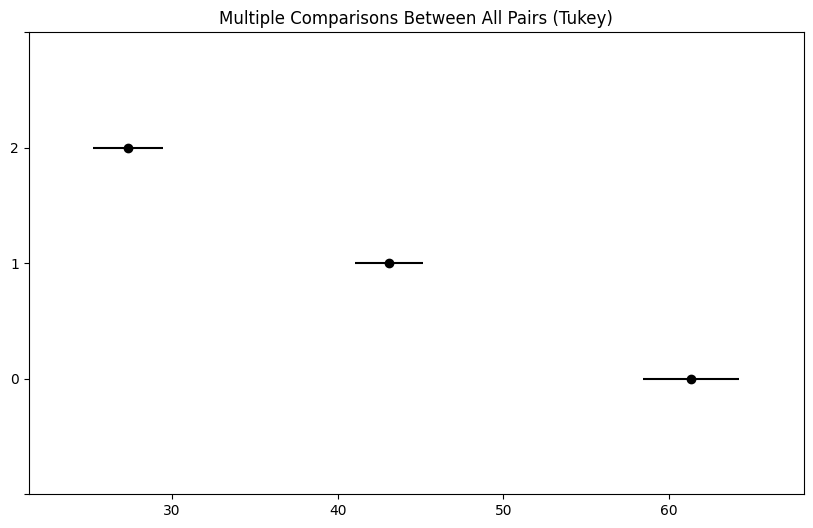

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(spp['CNT'], spp['Ta_gubun'], alpha=0.05)
print(posthoc.summary())
fig = posthoc.plot_simultaneous()

사후 분석결과를 살펴보면 0-1-2 그룹 세가지 비교에 대해서 모두 수정된 p-value(p-adj)이 0.05보다 작으므로 각각의 비교에 대한 귀무가설을 모두 기각한다.

즉, 모든 날씨에 대해서 매출건수의 평균값은 각각 통계적으로 유의한 차이가 있다는 것을 알 수 있다.

------------------------
### 이원배치 분산분석

https://mindscale.kr/course/basic-stat-python/24/

분산분석에서 반응값에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

예를 들어 성별과 학년에 따른 시험점수의 차이에 대해 통계적으로 검정하기 위해 이원배치 분산분석을 사용할 수 있다.

두 독립변수 A,B 사이에 상관관계가 있는지를 살펴보는 교호작용(두 독립변수의 범주들의 조합으로 인해 반응변수에 미치는 특별한 영향)에 대한 검증이 반드시 진행되어야 한다.

##### 가정

* 정규성: 집단/조건별 모집단들은 정규분포를 따른다는 가정
    * shapiro test나 Q-Q plot으로 확인 가능
* 독립성: 집단/조건별 개체(entity)들이 독립적이라는 가정
    * 연구 설계상 집단/조건 간 독립이고, 표본수집시 무선표집(random sampling)을 실시했다면 만족한다고 봄
* 등분산성: 집단/조건별 모집단들의 분산은 동일하다는 가정
    * box test나 levene test 등을 이용하여 검증

##### 주요 용어

* 주 효과: 다른 요인(집단구분 변수)과 상관없이, 한 요인의 수준(집단)에 따라 효과가 유의미하게 달라질 때 "주효과가 있다"고 함
* 상호작용 효과: 한 요인의 수준에 따른 효과의 차이가 또 다른 요인의 수준에 따라 달라질 때, "요인들 간 상호작용(효과)이 존재한다"고 함

##### 사후분석 vs 계획비교
* 다원분산분석의 사후분석 혹은 계획비교는 일원분산분석의 그것과 절차가 동일함
* 다만, 사후분석은 일반적으로 주효과에만 권장됨

##### 균형설계 vs 비균형설계
* 균형설계: 각 집단/조건별 표본수가 동일한 경우
* 비균형설계: 각 집단/조건별 표본수가 동일하지 않은 경우
* 균형설계와 비균형설계에 따라 계산 방법이 다름

### 예시

종속변수는 time, 독립변수는 posion과 treat이다.

귀무가설 1 - 변수(poison)에 따른 종속변수의 값에는 차이가 없다.

귀무가설 2 - 변수(treat)에 따른 종속변수의 값에는 차이가 없다.

귀무가설 3 - poison과 treat 간 상호작용 효과가 없다.

대립가설 1 - 변수(poison)에 따른 종속변수의 값에는 차이가 있다.

대립가설 2 - 변수(treat)에 따른 종속변수의 값에는 차이가 있다.

대립가설 3 - poison과 treat 간 상호작용 효과가 있다.

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv').drop('Unnamed: 0', axis=1)
df.head()

,time,poison,treat
0,0.31,1,A
1,0.45,1,A
2,0.46,1,A
3,0.43,1,A
4,0.36,2,A


In [48]:
print(df.groupby('poison').agg(len))
print(df.groupby('treat').agg(len))
print(df.groupby(['poison', 'treat']).agg(len))

#각 요인으로 구분한 집단별 표본수가 16,12,4로 동일함
# 따라서 해당 자료는 균형설계자료임을 확인할 수 있음.

        time  treat
poison             
1         16     16
2         16     16
3         16     16
       time  poison
treat              
A        12      12
B        12      12
C        12      12
D        12      12
              time
poison treat      
1      A         4
       B         4
       C         4
       D         4
2      A         4
       B         4
       C         4
       D         4
3      A         4
       B         4
       C         4
       D         4


In [49]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('time ~ C(poison) * C(treat)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(poison),2.0,1.033012,0.516506,23.221737,3.331440e-07
C(treat),3.0,0.921206,0.307069,13.805582,3.777331e-06
C(poison):C(treat),6.0,0.250138,0.041690,1.874333,1.122506e-01
Residual,36.0,0.800725,0.022242,NaN,NaN


poison: F(2, 36) = 23.222, p < 0.05로 유의미. 즉 poison의 수준에 따라 평균에 차이가 난다고 볼 수 있음

treat: F(3, 36) = 13.806, p < 0.05로 유의미. 즉 treat의 수준에 따라 평균에 차이가 난다고 볼 수 있음

poison:treat: F(6, 36) = 1.874, p > 0.05로 유의미하지 않음. 상호작용 효과는 발견하지 못함

##### 결과보고 
**two-way ANOVA 결과 보고 예시:** time에 대하여 poison과 treat를 요인으로 하는 이원분산분석을 실시한 결과, poison의 주효과는 유의미하였으며(F(2, 36) = 23.222, p < 0.05), treat의 주효과 또한 유의미하였으나(F(3, 36) = 13.806, p < 0.05), poison과 treat의 유의미한 상호작용효과는 발견할 수 없었다(F(6, 36) = 1.874, p > 0.05).

만약 상호작용이 유의미했다면, 다음과 같이 단순효과분석 결과를 첨부하여야 함

poison과 treat의 유의미한 상호작용 효과에 대하여 단순효과분석을 실시한 결과, poison이 1인 집단에서는 treat의 단순 주효과는 유의미하였고(F(3,36) = 6.8031, p < 0.05), poison이 2인 집단도 treat의 단순 주효과는 유의미하였으나(F(3,36) = 10.0367, p < 0.05), poison이 3인 집단에서는 treat의 단순 주효과가 유의미하지 않았다(F(3,36) = 0.7145, p > 0.05).

단순효과분석을 https://eigenvector.tistory.com/41 블로그에서 처럼 from bioinfokit.analys import stat을 사용해야 가능한 것 같은데, ADP 시험에서는 해당 패키지를 제공하지 않는다...ㅠㅠ 

아래에 해당 내용을 간략하게 정리함.

In [ ]:
from bioinfokit.analys import stat

result = stat()

result.tukey_hsd(df=Selling, res_var='Sales', xfac_var=['Place',"Marketing"], anova_model=model)
result.tukey_summary
#출처: https://eigenvector.tistory.com/41 [생각 저장소:티스토리]

세부적인 내용으로는 사후검정 (사후검정 방식, Tukey 등) 에 따라 (사후검정 조합)가 (테이블 값)으로 유의하게 높았다/낮았다. 를 기술하면 될듯!

위에 단순효과분석 결과를 첨부한 것 처럼!

출처: https://eigenvector.tistory.com/41 [생각 저장소:티스토리]

##### 비균형설계자료일 경우

anova_lm(model, typ=3)

#비균형설계자료의 경우 typ=3 옵션을 추가해준다.